# Giữa kỳ

## THÔNG TIN

- Họ tên:
- STT:
- MSV

Bài thi GK

In [1]:
# import library...
# ...
import pandas as pd

df_continent = pd.read_csv("gmp-continents.csv")
df_countries = pd.read_csv("gmp-countries.csv")

## ĐỀ BÀI

Hai bộ dữ liệu `gmp-continents.csv` và `gmp-countries.csv` chứa thông tin về các dân số quốc gia và khu vực qua các năm khác nhau

### Câu 1: (1 điểm)

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [2]:
print(df_continent.shape)
print(df_countries.shape)

(4, 223)
(197, 223)


### Câu 2 (2 điểm)

a, (1 điểm) Liệt kê top 5 nước có dân số cao nhất năm 2020

b, (1 điểm) Vẽ đồ thị pie-chart để hiển thị tỷ lệ dân số giữa các châu lục

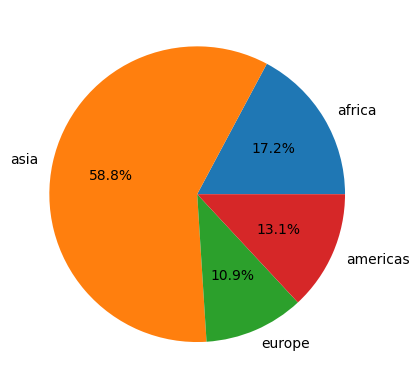

In [5]:
#a
x = df_countries.sort_values('2020' , ascending = False)
x.head(5)
#b

import matplotlib.pyplot as plt
x = df_continent['2020']
plt.pie(x, labels= ["africa","asia","europe","americas"],autopct="%1.1f%%")
plt.show()


### Câu 3: (2 điểm)

a, (1 điểm) Vẽ đồ thị histogram dân số các nước năm 2000. (Gợi ý: sử dụng hàm `np.log` để vẽ histogram của thuộc tính population thay vì vẽ histogram trực tiệp

b, (1 điểm) Vẽ đồ thị boxplot dân số các nước từ năm 2010 - 2020 (gợi ý: sử dụng hàm `melt()`)

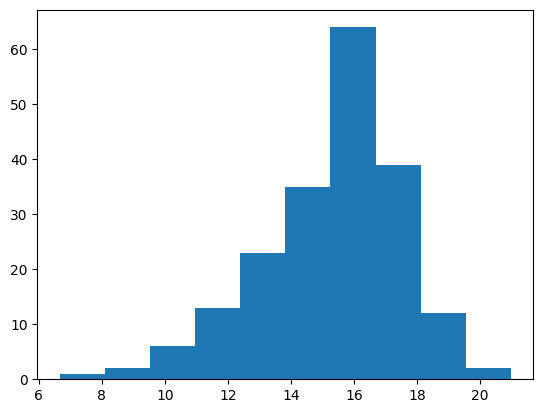

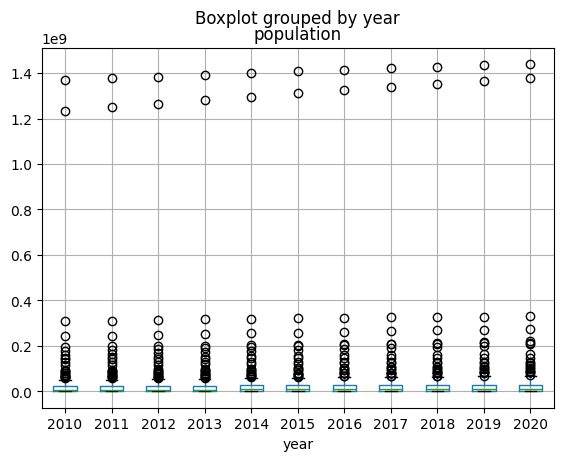

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#a
# help(np.log)
log = np.log(df_countries['2000']) 
plt.hist(log)
plt.show()

# b
df_countries
melted_df = df_countries.melt(id_vars=['geo','name'],value_vars = [str(year) for year in range(2010, 2021)], var_name='year', value_name='population')
# melted_df
melted_df.boxplot(column='population', by='year', ax=plt.gca())
plt.show()

#Vẽ đồ thị boxplot dân số các nước từ năm 2010 - 2020 (gợi ý: sử dụng hàm `melt()`)
# import seaborn as sns
# melted_df = df_countries.melt(id_vars=['geo','name'],value_vars = [str(year) for year in range(2010, 2021)], var_name='year', value_name='population')
# sns.boxplot(data=melted_df, x='year', y='population')
# plt.show()

### Câu 4: (2 điểm)

a, (1.5 điểm) Vẽ biểu đồ tăng trưởng về dân số của 10 quốc gia Đông Nam Á từ năm 2000-2020

b, (0.5 điểm) Dựa vào hình vẽ bạn hãy cho biết quốc gia nào có tốc độ tăng trưởng nhanh nhất?

C:\Users\DNCO\AppData\Local\Temp\ipykernel_12788\3824352948.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DNA.at[i, 'Growth Rate'] = growth_rate


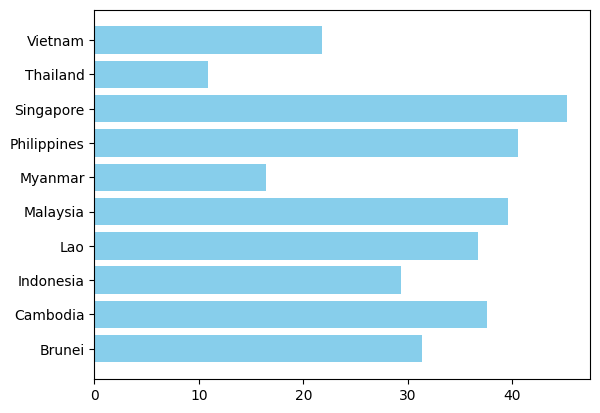

In [31]:
#a 
import matplotlib.pyplot as plt
# print(df_continent)
# print(df_countries)

df_DNA = df_countries[df_countries['name'].isin(['Vietnam', 'Thailand', 'Philippines', 'Myanmar', 'Indonesia', 'Malaysia', 'Cambodia', 'Lao', 'Singapore', 'Brunei'])]

# Tính toán tăng trưởng dân số cho mỗi quốc gia
for i, row in df_DNA.iterrows():
    start_population = row['2000']
    end_population = row['2020']
    growth_rate = ((end_population - start_population) / start_population) * 100
    df_DNA.at[i, 'Growth Rate'] = growth_rate
    
plt.barh(df_DNA['name'], df_DNA['Growth Rate'], color='skyblue')
plt.show()

#b


---